## HW4 by Denis Osipychev
# Tabular Policy Gradient
### Policy Gradient - REINFORCE

In [1]:
# import env and modules
import gym
import numpy as np
import myenv

In [2]:
# create an instance of env
env = myenv.GridWorldEnv()

In [3]:
# initialize hyperparams for PG
n_episodes = 10000
episode_lenght = 100
gamma = 0.9
alpha = 0.001
update_freq = 1000

In [4]:
# initialize random policy weights
def policy_init():
    #policy = np.zeros([env.observation_space.n, env.action_space.n])
    policy = np.random.rand(env.observation_space.n, env.action_space.n)-0.5
    #print('Policy:\n',policy)
    return policy

In [5]:
# function to discount reward in trajectory
def discount_rewards(r):
    discounted_reward = np.zeros_like(r)
    running_reward = 0
    for t in reversed(range(0,len(r))):
        running_reward = running_reward*gamma + r[t]
        discounted_reward[t] = running_reward
    return discounted_reward

In [6]:
# stable softmax (taken from https://deepnotes.io/softmax-crossentropy)
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

In [7]:
# gradient function for softmax given single trajectory (based on lecture notes)
def gradient(policy, s_arr, a_arr, r_arr):
    n = len(r_arr)
    g = np.zeros_like(policy)
    for t in range(n):
        dp = np.eye(4)[a_arr[t]] - softmax(policy[s_arr[t]]) #one hot vector -minus policy for one state
        g[s_arr[t]] = g[s_arr[t]] + dp * r_arr[t] #accumulate gradients through trajectory
    return g

In [8]:
# PG REINFORCE algorithm
def PolicyGrad(policy):
    stats = []
    grad_buffer = np.zeros_like(policy)
            
    for i_episode in range(n_episodes):
        r_total = 0
        s = env.reset()[:]
        trajectory = []
            
        for t in range(episode_lenght):
        
            s_flat = s[0] * 5 + s[1] #flatter state from 2D to 1D to simplify policy matrix
            a_distr = softmax(policy[s_flat]) #get prob distr over actions
            a = np.random.choice(np.arange(4), p=a_distr) #draw an action w.r. to prob distr
            s_prime, r, d, _ = env.step(a)

            trajectory.append([s_flat,a,r])
                
            s = s_prime[:]
            r_total += r
                
            if d:
                break
                     
        # update gradient buffer with new trajectory
        s_arr, a_arr, r_arr = zip(*trajectory)
        r_arr = discount_rewards(r_arr)
        grad = gradient(policy, s_arr, a_arr, r_arr)
        grad_buffer = grad_buffer + grad #accumulate gradients b/w updates
        
        if i_episode % update_freq == 0 and i_episode!=0:
            policy = policy + alpha*grad_buffer
            grad_buffer = np.zeros_like(policy)
            #print('Policy updated')
        
        # Update statistics
        stats.append([i_episode,r_total])
        
        if i_episode % 100 == 0:
            print(' Epoch:',i_episode,',Average R:',np.mean(np.asarray(stats)[-100:,1]))
    
    return policy,stats

In [9]:
# print a policy (taken from Dr. West solution and adapted)
def print_policy(policy_matrix):
    output = ''
    k = 0
    for i in range(5):
        for j in range(5):
            s = i*5 + j
            a = policy_matrix[s,:].argmax()
            c = [u"⇧",u"⇩",u"⇦",u"⇨"][a]
            output += c
            k += 1
        output += '\n'
    return output

In [10]:
# run the algorithm to get statistics (simple env)
env.stochastic_transitions = False
policy = policy_init()
policy, statsPGa = PolicyGrad(policy)

 Epoch: 0 ,Average R: -25.0
 Epoch: 100 ,Average R: -7.51
 Epoch: 200 ,Average R: -5.71
 Epoch: 300 ,Average R: -5.84
 Epoch: 400 ,Average R: -5.88
 Epoch: 500 ,Average R: -4.81
 Epoch: 600 ,Average R: -6.48
 Epoch: 700 ,Average R: -3.63
 Epoch: 800 ,Average R: -4.07
 Epoch: 900 ,Average R: -5.31
 Epoch: 1000 ,Average R: -5.96
 Epoch: 1100 ,Average R: 84.29
 Epoch: 1200 ,Average R: 83.51
 Epoch: 1300 ,Average R: 85.13
 Epoch: 1400 ,Average R: 83.35
 Epoch: 1500 ,Average R: 83.4
 Epoch: 1600 ,Average R: 86.55
 Epoch: 1700 ,Average R: 84.42
 Epoch: 1800 ,Average R: 85.43
 Epoch: 1900 ,Average R: 84.53
 Epoch: 2000 ,Average R: 85.57
 Epoch: 2100 ,Average R: 163.96
 Epoch: 2200 ,Average R: 165.8
 Epoch: 2300 ,Average R: 163.38
 Epoch: 2400 ,Average R: 166.5
 Epoch: 2500 ,Average R: 163.66
 Epoch: 2600 ,Average R: 164.24
 Epoch: 2700 ,Average R: 165.88
 Epoch: 2800 ,Average R: 165.57
 Epoch: 2900 ,Average R: 162.42
 Epoch: 3000 ,Average R: 163.27
 Epoch: 3100 ,Average R: 166.65
 Epoch: 3200

In [12]:
print("Policy (simple case):")
print(print_policy(policy))

Policy (simple case):
⇦⇦⇦⇦⇦
⇧⇧⇧⇧⇧
⇨⇨⇧⇧⇧
⇦⇧⇧⇧⇧
⇨⇨⇧⇧⇨



In [13]:
# run the algorithm to get statistics (complex env)
env.stochastic_transitions = True
policy = policy_init()
policy, statsPGb = PolicyGrad(policy)

 Epoch: 0 ,Average R: 16.0
 Epoch: 100 ,Average R: 4.98
 Epoch: 200 ,Average R: 6.88
 Epoch: 300 ,Average R: 7.11
 Epoch: 400 ,Average R: 7.98
 Epoch: 500 ,Average R: 7.81
 Epoch: 600 ,Average R: 8.11
 Epoch: 700 ,Average R: 6.83
 Epoch: 800 ,Average R: 4.92
 Epoch: 900 ,Average R: 5.84
 Epoch: 1000 ,Average R: 9.17
 Epoch: 1100 ,Average R: 103.64
 Epoch: 1200 ,Average R: 102.32
 Epoch: 1300 ,Average R: 104.7
 Epoch: 1400 ,Average R: 102.89
 Epoch: 1500 ,Average R: 104.79
 Epoch: 1600 ,Average R: 104.47
 Epoch: 1700 ,Average R: 102.46
 Epoch: 1800 ,Average R: 102.28
 Epoch: 1900 ,Average R: 103.06
 Epoch: 2000 ,Average R: 103.32
 Epoch: 2100 ,Average R: 164.06
 Epoch: 2200 ,Average R: 167.32
 Epoch: 2300 ,Average R: 166.97
 Epoch: 2400 ,Average R: 167.38
 Epoch: 2500 ,Average R: 167.14
 Epoch: 2600 ,Average R: 164.79
 Epoch: 2700 ,Average R: 166.23
 Epoch: 2800 ,Average R: 167.64
 Epoch: 2900 ,Average R: 166.48
 Epoch: 3000 ,Average R: 167.66
 Epoch: 3100 ,Average R: 168.23
 Epoch: 320

In [14]:
print("Policy (simple case):")
print(print_policy(policy))

Policy (simple case):
⇦⇧⇧⇧⇧
⇧⇧⇧⇧⇧
⇨⇧⇧⇧⇧
⇩⇧⇧⇧⇧
⇨⇧⇧⇧⇨



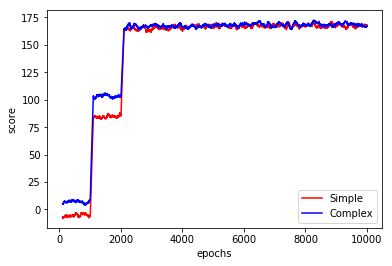

In [18]:
#plot the results (taken from https://gist.github.com/vksah32/8ba7ee7489bd8ec50c995f6216adcb7d)
import pandas as pd
import matplotlib.pyplot as plt 

mean_x1 = pd.Series(np.asarray(statsPGa)[:,1]).rolling(window=100).mean()
mean_x2 = pd.Series(np.asarray(statsPGb)[:,1]).rolling(window=100).mean()
itr = range(n_episodes)

plt.xlabel("epochs")
plt.ylabel("score")
plt.plot(itr, mean_x1, 'r-')
plt.plot(itr, mean_x2, 'b-')
plt.legend(['Simple','Complex'])
plt.show()

# Tabular Q-learning and SARSA

In [19]:
# initialize hyper parameters
epsilon = 0.1

In [20]:
# epsilon greedy policy
def greedy_policy(Q, state):
    if np.random.uniform() < epsilon:
#         best_action = int(np.random.uniform() * 4 // 1)
        best_action = np.random.randint(4)
    else:
        best_action = np.argmax(Q[state[0]][state[1]])
    return best_action

In [21]:
#SARSA algorithm
def SARSA(Q):
    stats = []
    
    for i_episode in range(n_episodes):
        r_total = 0
        s = env.reset()[:]
        a = greedy_policy(Q, s)
    
        for t in range(episode_lenght):
        
            s_prime, r, d, _ = env.step(a)
            a_prime = greedy_policy(Q, s_prime)
        
            # Q Update
            q_target = r + gamma * Q[s_prime[0]][s_prime[1]][a_prime]
            q_delta = q_target - Q[s[0]][s[1]][a]
            Q[s[0]][s[1]][a] = Q[s[0]][s[1]][a] + alpha * q_delta
    
            if d:
                break
                
            a = a_prime
            s = s_prime[:]
            r_total += r
        
        # Update statistics
        stats.append([i_episode,r_total])
    return Q, stats

In [22]:
def Q_Learn(Q):
    stats = []

    for i_episode in range(n_episodes):

        r_total = 0
        s = env.reset()[:]
        a = greedy_policy(Q, s)
    
        for t in range(episode_lenght):
        
            a = greedy_policy(Q, s)
            s_prime, r, d, _ = env.step(a)
            
            # Q Update
            q_target = r + gamma * max(Q[s_prime[0]][s_prime[1]][:])
            q_delta = q_target - Q[s[0]][s[1]][a]
            Q[s[0]][s[1]][a] = Q[s[0]][s[1]][a] + alpha * q_delta
    
            if d:
                break
                
            s = s_prime[:]
            r_total += r
        
        # Update statistics
        stats.append([i_episode,r_total])
    
    return Q, stats

In [23]:
# run the algorithm to get statistics (simple env) 
env.stochastic_transitions = False
Q = np.zeros((5,5,4))
Q, statsSARSAa = SARSA(Q)

Q = np.zeros((5,5,4))
Q, statsQLa = Q_Learn(Q)

In [24]:
# run the algorithm to get statistics (complex env)
env.stochastic_transitions = True
Q = np.zeros((5,5,4))
Q, statsSARSAb = SARSA(Q)

Q = np.zeros((5,5,4))
Q, statsQLb = Q_Learn(Q)

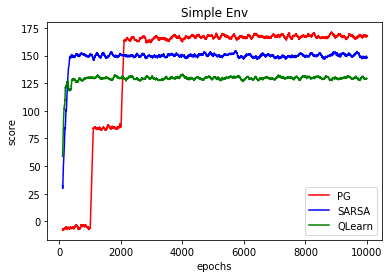

In [25]:
#plot the results (taken from https://gist.github.com/vksah32/8ba7ee7489bd8ec50c995f6216adcb7d)
import pandas as pd
import matplotlib.pyplot as plt 

mean_x1 = pd.Series(np.asarray(statsPGa)[:,1]).rolling(window=100).mean()
mean_x2 = pd.Series(np.asarray(statsSARSAa)[:,1]).rolling(window=100).mean()
mean_x3 = pd.Series(np.asarray(statsQLa)[:,1]).rolling(window=100).mean()

itr = range(n_episodes)

plt.xlabel("epochs")
plt.ylabel("score")
plt.plot(itr, mean_x1, 'r-')
plt.plot(itr, mean_x2, 'b-')
plt.plot(itr, mean_x3, 'g-')
plt.legend(['PG','SARSA','QLearn'])
plt.title('Simple Env')
plt.show()

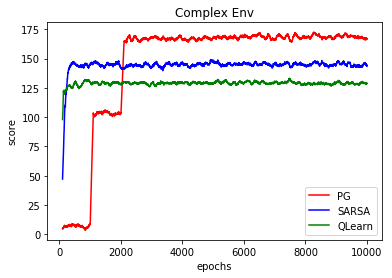

In [26]:
#plot the results (taken from https://gist.github.com/vksah32/8ba7ee7489bd8ec50c995f6216adcb7d)
import pandas as pd
import matplotlib.pyplot as plt 

mean_x1 = pd.Series(np.asarray(statsPGb)[:,1]).rolling(window=100).mean()
mean_x2 = pd.Series(np.asarray(statsSARSAb)[:,1]).rolling(window=100).mean()
mean_x3 = pd.Series(np.asarray(statsQLb)[:,1]).rolling(window=100).mean()

itr = range(n_episodes)

plt.xlabel("epochs")
plt.ylabel("score")
plt.plot(itr, mean_x1, 'r-')
plt.plot(itr, mean_x2, 'b-')
plt.plot(itr, mean_x3, 'g-')
plt.legend(['PG','SARSA','QLearn'])
plt.title('Complex Env')
plt.show()